# External Test Set Inference

This notebook loads the trained EfficientNetB0 model and performs inference on external test images (images not included in the training/validation/test split).

## 1. Import Required Libraries

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os

## 2. Configuration

Set image size and external test directory path.

In [6]:
# Image size must match the training configuration (EfficientNetB0 default)
IMG_SIZE = (224, 224)

# Path to external test images directory
EX_TEST_DIR = Path(os.getcwd()).parent / "ex-data"
print("External test directory:", EX_TEST_DIR)
print("Directory exists:", EX_TEST_DIR.exists())

External test directory: c:\Users\user\1- Notebook\image\egyptian-new-currency-classifier\ex-data
Directory exists: True


## 3. Load Trained Model

Load the saved model with architecture and trained weights.

In [7]:
# Load the complete saved model (architecture + weights)
model = tf.keras.models.load_model("../checkpoints/EfficientNetB0/effnet_b0_transfer_final-only-fe.keras")
print("Model loaded successfully")

Model loaded successfully


## 4. Run Inference on External Images

Process each image in the external test directory and display predictions with confidence scores.


Prediction for 12912727-600x450.jpeg:
  Probabilities: [[0.0281271  0.10373095 0.10887183 0.0299533  0.49245325 0.12243545
  0.02298362 0.03948911 0.05195538]]


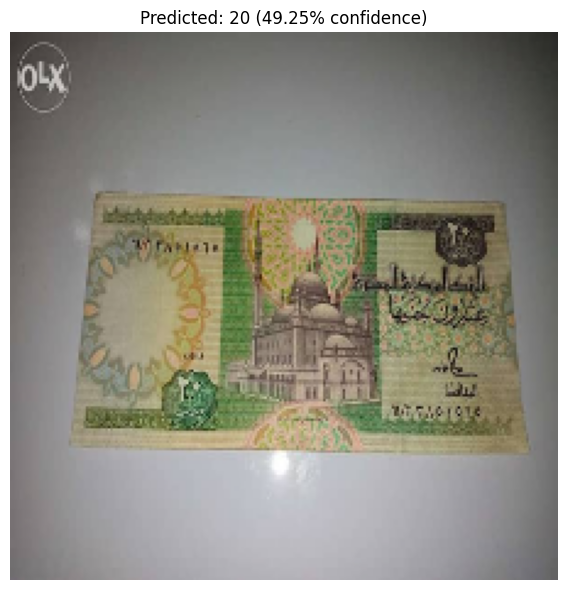


Prediction for 202406041633317295.jpg:
  Probabilities: [[0.2776298  0.04096462 0.02775571 0.06549779 0.25137615 0.0217709
  0.04922166 0.10815786 0.15762551]]


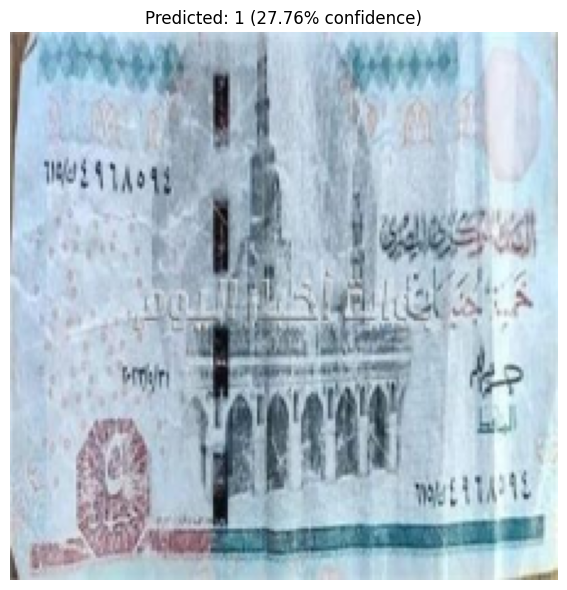


Prediction for download.jpg:
  Probabilities: [[0.00770661 0.00179546 0.9508374  0.01658958 0.0048015  0.00153013
  0.00620852 0.00525992 0.00527086]]


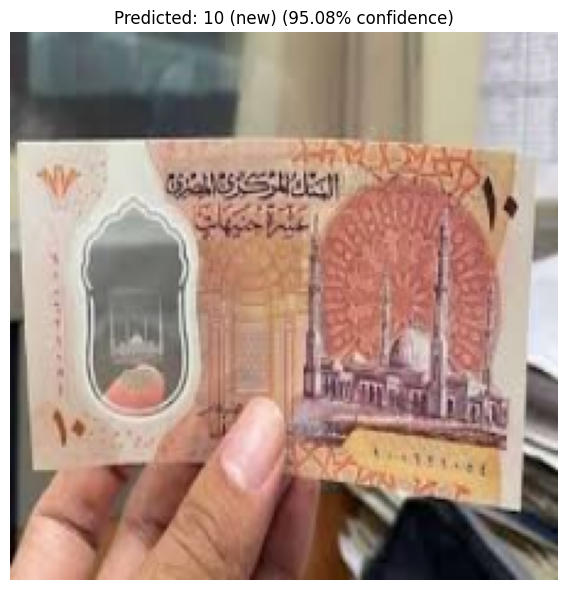

In [8]:
# Class names in alphabetical order (matching flow_from_directory sorting)
class_names = ['1', '10', '10 (new)', '100', '20', '20 (new)', '200', '5', '50']

# EfficientNet-specific preprocessing function (CRITICAL: must match training)
preproc = tf.keras.applications.efficientnet.preprocess_input

# Check if external test directory exists
if not EX_TEST_DIR.exists():
    print(f"Error: Directory does not exist: {EX_TEST_DIR}")
    print("Please create the directory or check the path")
else:
    # Process each image in the directory
    for image in os.listdir(EX_TEST_DIR):
        image_path = os.path.join(EX_TEST_DIR, image)
        
        # Load image using OpenCV
        img = cv2.imread(image_path)
        
        # Convert from BGR (OpenCV default) to RGB (required for display)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Resize to model input size
        img_resized = cv2.resize(img, IMG_SIZE)

        # Prepare image for prediction
        img_array = np.expand_dims(img_resized, axis=0)  # Add batch dimension [1, 224, 224, 3]
        img_array = preproc(img_array)                   # Apply EfficientNet preprocessing
        
        # Make prediction
        pred = model.predict(img_array, verbose=0)
        print(f"\nPrediction for {image}:")
        print(f"  Probabilities: {pred}")
        
        # Get predicted class and confidence
        pred_idx = np.argmax(pred)
        pred_class = class_names[pred_idx]
        confidence = pred[0][pred_idx] * 100

        # Display image with prediction
        plt.figure(figsize=(6, 6))
        plt.imshow(img_resized)
        plt.title(f"Predicted: {pred_class} ({confidence:.2f}% confidence)")
        plt.axis('off')
        plt.tight_layout()
        plt.show()